# Model Evalutaion

In [1]:
import gym
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from stable_baselines3 import PPO
from env.portfolioEnv import PortfolioEnv
from data.load import get_data

In [2]:
SYMBOLS = ['AAPL', 'MSFT', 'GOOGL', 'AMZN', 'TSLA']
START_DATE = '2020-01-01'
END_DATE = '2021-01-01'

data = get_data(SYMBOLS, START_DATE, END_DATE)

Loading data for AAPL...
Loading data for MSFT...
Loading data for GOOGL...
Loading data for AMZN...
Loading data for TSLA...


In [11]:
data.head()

open      high      low   close    volume
symbol timestamp                                                             
AAPL   2020-01-02 05:00:00+00:00  296.24  300.6000  295.190  300.35  36554338
       2020-01-03 05:00:00+00:00  297.15  300.5800  296.500  297.43  38677814
       2020-01-06 05:00:00+00:00  293.79  299.9600  292.750  299.80  31399992
       2020-01-07 05:00:00+00:00  299.84  300.9000  297.480  298.39  29556784
       2020-01-08 05:00:00+00:00  297.16  304.4399  297.156  303.19  35684201

In [10]:
# print("Data shape:", data.shape)
data[data['symbol'] == 'TSLA'].head(10)
# print("Unique symbols:", data.index.get_level_values(0).unique())
# print("Unique dates:", len(data.index.get_level_values(1).unique()))



KeyError: 'symbol'

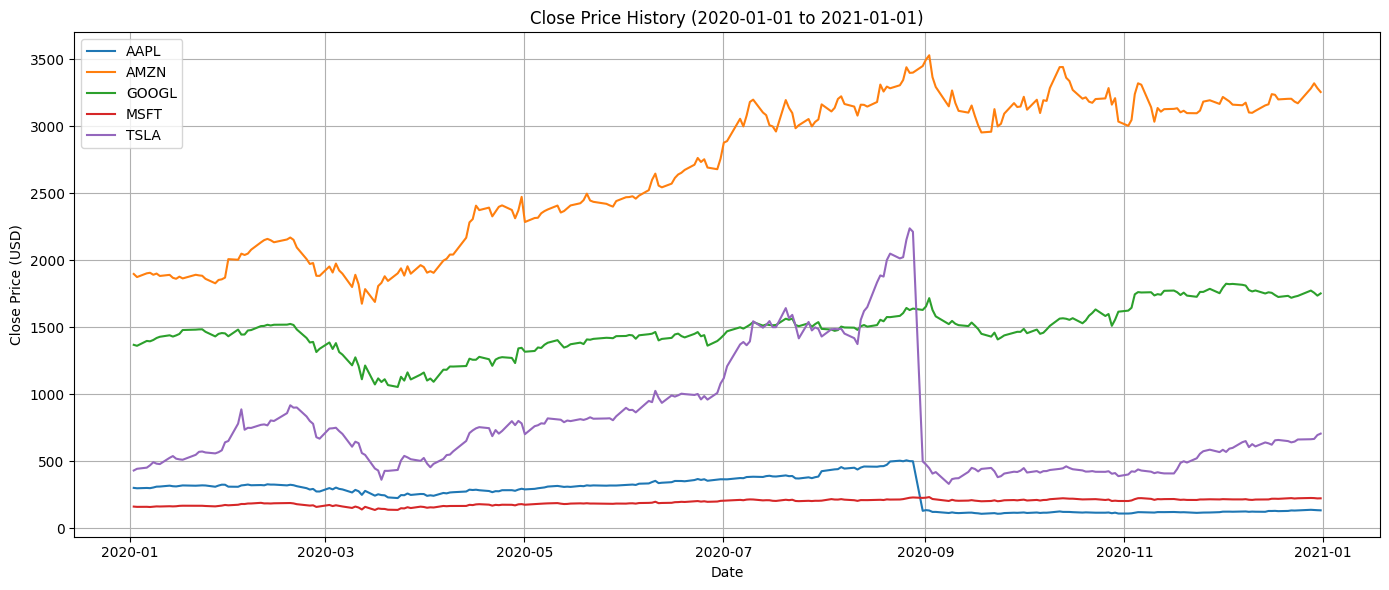

In [7]:
# import matplotlib.pyplot as plt

# Reset index to work with columns
df = data.reset_index()

plt.figure(figsize=(14, 6))

# Loop through each symbol and plot its closing price
for symbol in df['symbol'].unique():
    symbol_data = df[df['symbol'] == symbol]
    plt.plot(symbol_data['timestamp'], symbol_data['close'], label=symbol)

plt.title("Close Price History ({} to {})".format(START_DATE, END_DATE))
plt.xlabel("Date")
plt.ylabel("Close Price (USD)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [ ]:
# Set the env
env = PortfolioEnv(data)

# Path to trained model .zip file
PATH = "models/ppo_portfolio"
model = PPO.load(PATH)  

In [ ]:
obs = env.reset()
done = False
total_reward = 0
portfolio_values = []

while not done:
    action, _ = model.predict(obs, deterministic=True)
    obs, reward, done, info = env.step(action)
    total_reward += reward
    portfolio_values = env.portfolio_value_history

print(f"Total reward from evaluation episode: {total_reward:.2f}")

In [ ]:
plt.figure(figsize=(10, 5))
plt.plot(portfolio_values, label="Portfolio Value", color="blue")
plt.title("📈 Portfolio Value Over Time")
plt.xlabel("Time Step")
plt.ylabel("Portfolio Value ($)")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()